In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X, y = iris.data, iris.target

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

训练集大小: (105, 4)
测试集大小: (45, 4)


## 模型训练

In [15]:
from sklearn.tree import DecisionTreeClassifier
	
# 初始化决策树模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

print("模型训练完成")

模型训练完成


## 模型评估

In [20]:
from sklearn.metrics import accuracy_score, classification_report
	
# 在测试集上进行预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("测试集准确率:", accuracy)

# 输出分类报告
print("分类报告:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

测试集准确率: 0.9777777777777777
分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



决策树规则:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.15
|   |   |   |--- class: 2



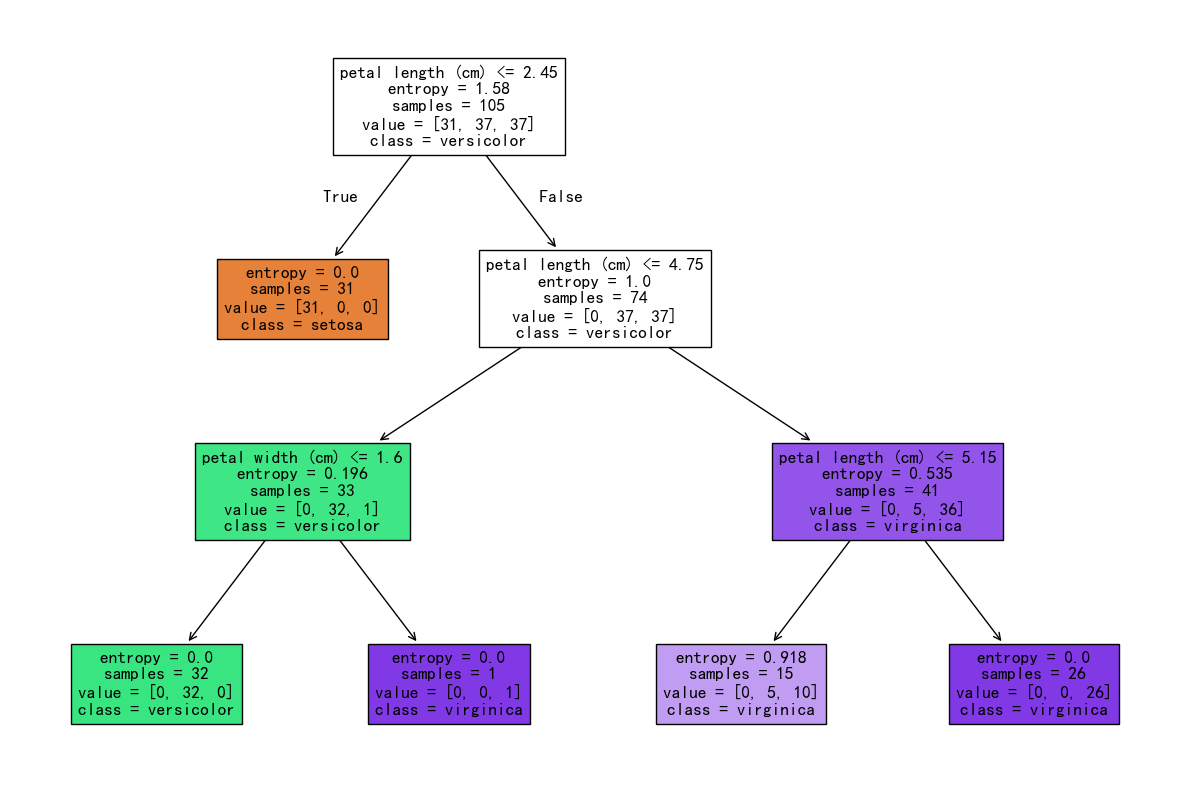

In [19]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
# 设置支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置支持负号
plt.rcParams['axes.unicode_minus'] = False

# 打印决策树的文本规则
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("决策树规则:\n", tree_rules)

# 绘制决策树图形
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.title("决策树可视化")
plt.tight_layout()
plt.show()

## 决策树决策面

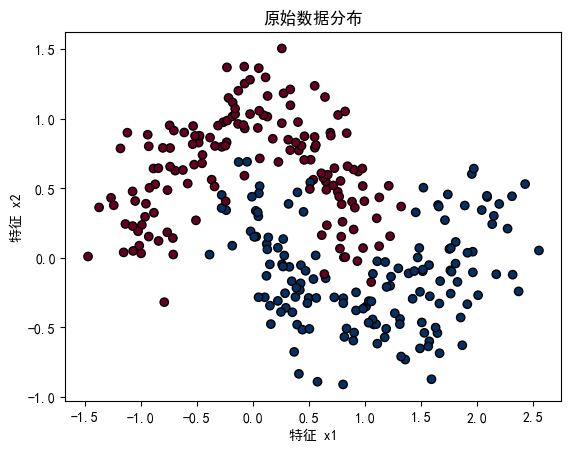

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# 生成二维数据集
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 可视化数据分布
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
plt.title("原始数据分布")
plt.xlabel("特征 x1")
plt.ylabel("特征 x2")
plt.show()

In [22]:
from sklearn.tree import DecisionTreeClassifier

# 初始化决策树模型
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 训练模型
clf.fit(X_train, y_train)

print("模型训练完成")

模型训练完成


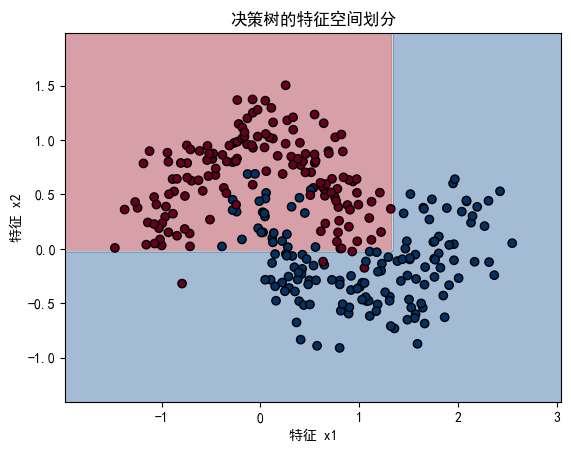

In [23]:
from matplotlib.colors import ListedColormap

# 定义绘图函数
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='k')
    plt.title("决策树的特征空间划分")
    plt.xlabel("特征 x1")
    plt.ylabel("特征 x2")
    plt.show()

# 绘制决策边界
plot_decision_boundary(clf, X, y)

## 特征重要程度

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 加载数据集
california = fetch_california_housing()
X, y = california.data, california.target

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 初始化决策树回归模型
reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# 训练模型
reg.fit(X_train, y_train)

print("模型训练完成")
from sklearn.metrics import mean_squared_error, r2_score

# 在测试集上进行预测
y_pred = reg.predict(X_test)

# 计算均方误差和决定系数
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("测试集均方误差 (MSE):", mse)
print("测试集决定系数 (R^2):", r2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 获取特征重要性
feature_importances = reg.feature_importances_

# 绘制特征重要性
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(california.feature_names)), california.feature_names)
plt.xlabel("特征重要性")
plt.title("决策树特征重要性")
plt.show()